<a href="https://colab.research.google.com/github/Seungwon-hub/ESAA/blob/main/ESAA_YB_Week4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 5. 데이터 전처리

- 결손값, NaN, Null값 허용 안됨.
- 피처 값 중 Null 값이 얼마 되지 않으면 피처의 평균값으로 대체
- Null값이 대부분이라면 드롭하는 것이 좋음
- 문자열 값을 입력값으로 허용하지 않음 -> 모든 문자열 값은 인코딩돼서 숫자 형으로 변환해야 함.
- 문자열 피처: 카테고리형 피처 & 텍스트형 피처
- 텍스트형 피처 -> 피처 벡터화 등의 기법으로 벡터화하거나 불필요한 피처이면 삭제하는게 좋음

### 데이터 인코딩

대표적인 인코딩 방식: **레이블 인코딩(Label encoding)** & **원-핫 인코딩(One Hot encoding)**

#### 레이블 인코딩

- 카테고리 피처를 코드형 숫자 값으로 변환하는 것
- 사이킷런의 LabelEncoder 클래스로 구현
- LabelEncoder를 객체로 생성한 후 fit()과 transform()을 호출해 레이블 인코딩 수행

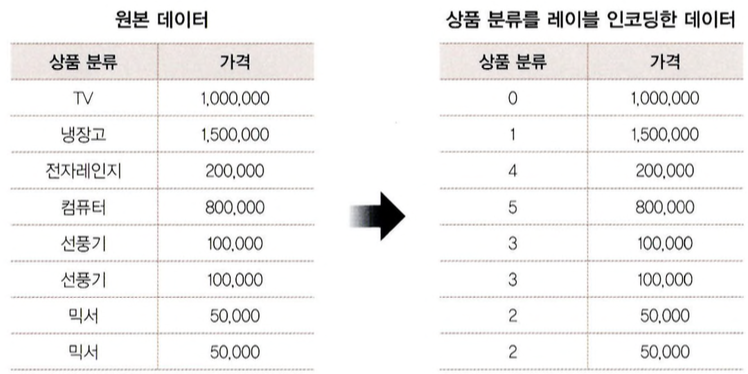

In [ ]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 반환값:', labels)

인코딩 반환값: [0 1 4 5 3 3 2 2]


위 예제는 데이터가 작아서 문자열 값이 어떤 숫자 값으로 인코딩됐는지 직관적으로 알 수 있지만 많은 경우에 이를 알지 못함.

In [ ]:
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


classes_속성은 0번부터 순서대로 변환된 인코딩 값에 대한 원본값을 갖고 있음. inverse_transform()을 통해 인코딩된 값을 다시 디코딩할 수 있음.

In [ ]:
print('디코딩 원본 값:', encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본 값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


< 레이블 인코딩 >
- 문자열 값을 숫자형 카테고리 값으로 변환
- 일괄적인 숫자 값으로 변환이 되면서 몇몇 ML 알고리즘에는 이를 적용할 경우 예측 성능이 떨어질 수 있음 -> 이는 숫자 값의 경으 크고 작음에 대한 특성이 작용하기 때문임.
- 냉장고 1, 믹서 2로 변환되면 1보다 2가 더 큰 값이므로 특정 ML알고리즘에서 가중치가 더 부여되거나 더 중요하게 인식될 가능성이 있음. -> 선형 회귀와 같은 알고리즘에는 적용하지 않아야 함.

#### 원-핫 인코딩 (One-Hot Encoding)

- 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식
- 행 형태로 되어 있는 피처의 고유값을 열 형태로 차원 변환한 뒤 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시
- 사이킷런의 OneHotEncoder 클래스로 변환 가능
- 입력값으로 2차원 데이터 필요함 & OneHotEncoder를 이용해 변환한 값이 희소 행렬(sparse matrix) 형태이므로 다시 toarray() 메서드 이용해 Dense matrix로 변환해야 함

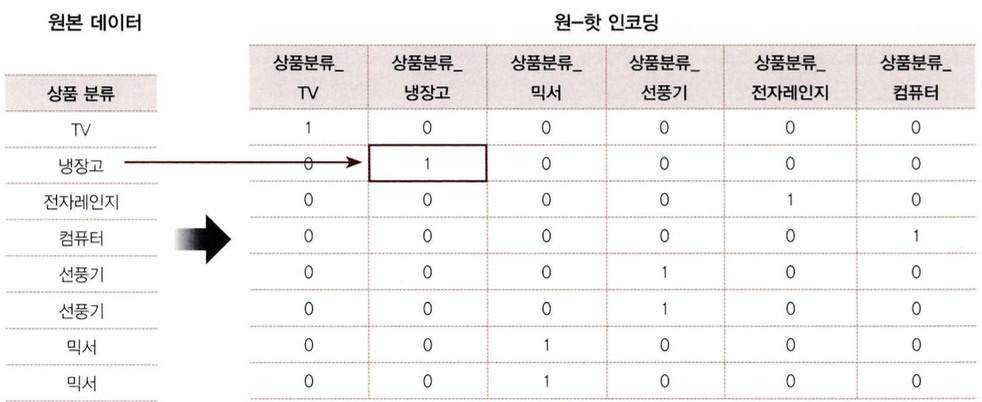

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']


# 2차원 ndarray로 변환
items = np.array(items).reshape(-1,1)

# 원-핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

# OneHotEncoder로 변환한 결과는 희소행렬이므로 toarray()를 이용해 밀집 행렬로 변환
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


8개의 레코드와 1개의 칼럼을 가진 원본 데이터가 8개의 레코드와 6개의 칼럼을 가진 데이터로 변환됨.

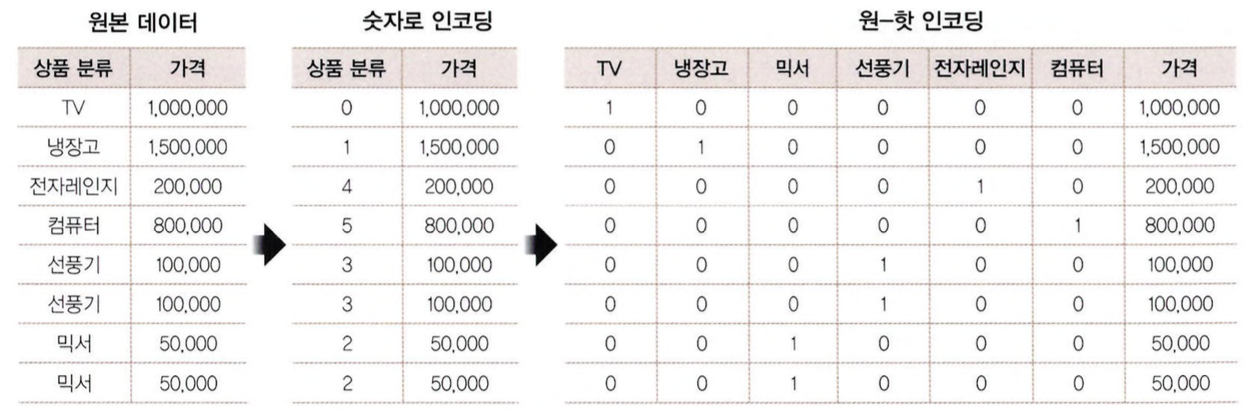

판다스에는 원-핫 인코딩을 더 쉽게 지원하는 API가 있음
- **get_dummies()**: 원-핫 인코더와는 다르게 문자열 카테고리 값을 숫자형으로 변환할 필요 없이 바로 변환 가능

In [ ]:
import pandas as pd

df = pd.DataFrame({'item': ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})

pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,True,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,False,False,True,False
3,False,False,False,False,False,True
4,False,False,False,True,False,False
5,False,False,False,True,False,False
6,False,False,True,False,False,False
7,False,False,True,False,False,False


### 피처 스케일링과 정규화

- 피처 스케일링: 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업
- 대표적 방법: 표준화(Standardization) & 정규화(Normalization)

< 표준화 >
- 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것

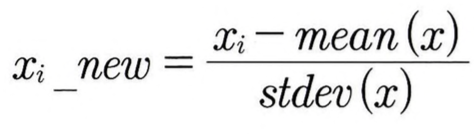

< 정규화 >
- 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념
- 예를 들어 A는 거리를 나타내는 변수로서 0~100KM로 주어지고 B는 금액을 나타내는 속성으로 값이 0~100,000,000,000원으로 주어졌을 때 이 변수를 모두 동일한 크기 단위로 비교하기 위해 값을 모두 0~1의 값으로 변환

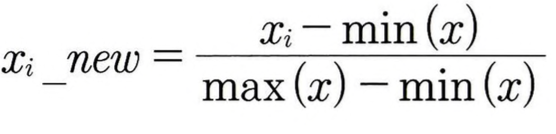

< 사이킷런의 Normalizer 모듈 >
- 선형대수에서의 정규화 개념 적용, 즉 개별 벡터의 크기를 맞추기 위해 변환
- 개별 벡터를 모든 피처 벡터의 크기로 나눠 줌

### StandardScaler
- 표준화를 쉽게 지원하기 위한 클래스
- 개별 피처를 평균이 0이고 분산이 1인 값으로 변환
- 사이킷런에서 구현한 RBF 커널을 이용하는 SVM, 선형 회귀, 로지스틱 회귀는 데이터가 가우시안 분포를 갖고 있다고 가정하고 구현 -> 표준화 적용하는 것은 예측 성능 향상이 중요한 요소

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 세트를 로딩하고 DateFrame으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)

print('feature들의 평균 값')
print(iris_df.mean())
print('\nfeature들의 분산 값')
print(iris_df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


StandardScaler객체 생성 후에 fit()과 transform()메서드에 변환 대상 피처 데이터 세트를 입력하고 호출하면 변환됨.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standard 객체 생성
scaler = StandardScaler()

# StandardScaler로 데이터 세트 변환. fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산 값')
print(iris_df_scaled.var())


feature들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


### MinMaxScaler
- 데이터값을 0과 1사이의 범위 값으로 변환
- 음수 값이 있으면 -1에서 1값으로 변환
- 데이터의 분포가 가우시안 분포가 아닐 경우 Min, Max Scale 적용해 볼 수 있음

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점

- fit(): 데이터 변환을 위한 기준 정보 설정
- transform(): 이렇게 설정된 정보를 이용해 데이터를 변환

< 주의사항 >

학습 데이터 세트로 fit()과 transform()을 적용하면 테스트 데이터 세트로는 다시 fit()을 수행하지 않고 학습 데이터 세트로 fit()을 수행한 결과를 이용해 transform() 변환을 적용해야 한다는 것임.

즉, 학습 데이터로 fit()이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용해야 함.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1,1)로 차원 변경
train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10 -> 1 로 변환됨.
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


테스트 데이터 세트를 변환하는데, fit()을 호출해 스케일링 기준 정보를 다시 적용한 뒤 transform()을 수행한 결과 확인

In [ ]:
# MinMaxScaler에 test_array를 fit()하게 되면 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함. 원본 5 -> 1 로 변환
test_scaled = scaler.transform(test_array)

# test_array의 scale 변환 출력
print('원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


출력 결과 학습 데이터와 테스트 데이터의 스케일링이 맞지 않음. 학습 데이터와 테스트 데이터의 서로 다른 원본값이 동일한 값으로 변환되는 결과를 초래. 머신러닝 모델은 학습 데이터를 기반으로 학습되기 때문에 반드시 테스트 데이터는 학습 데이터의 스케일링 기준에 따라야 하며, 테스트 데이터의 1값은 학습 데이터와 동일하게 0.1 값으로 변환돼야 함.

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform()만으로 변환해야 함
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


- **fit_transform()**: fit()과 transform()을 순차적으로 수행하는 메서드
- 학습 데이터에서는 상관없지만 테스트 데이터에서는 절대 사용하면 안됨
- 학습과 테스트 데이터 세트로 분리하기 전에 먼저 전체 데이터 세트에 스케일링 적용한 뒤 학습과 테스트 데이터 세트로 분리하는 것이 바람직

< 유의할 점 요약 >
1. 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리
2. 1이 여의치 않으면 테스트 데이터 변환 시에는 fit()이나 fit_transform() 적용하지 않고 학습 데이터로 이미 fit()된 Scaler 객체를 이용해 transform()으로 변환

## 6. 사이킷런으로 수행하는 타이타닉 생존자 예측

- Passengerid: 탑승자 데이터 일련번호
- survived: 생존 여부(0=사망, 1=생존)
- pclass: 티켓의 선실 등급(1=일등석, 2=이등석, 3=삼등석)
- sex: 성별
- name: 이름
- Age: 나이
- sibsp: 같이 탑승한 형제자매 또는 배우자 인원수
- parch: 같이 탑승한 부모님 또는 어린이 인원수
- ticket: 티켓 번호
- fare: 요금
- cabin: 선실 번호
- embarked: 중간 정착 항구(C=Cherbourg, Q=QueenStown, S=Southampton)

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [30]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


RangeIndex는 Dataframe 인덱스 범위를 나타내므로 전체 로우 수를 알 수 있음.
- 891개의 로우 & 12개의 칼럼
- Age, Cabin, Embarked 칼럼은 각각 714, 204, 889개의 Not Null값을 가지고 있으므로 각각 177, 608, 2개의 null값을 갖고 있음
- 사이킷런 머신러닝 알고리즘은 Null값을 허용하지 않음

In [32]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 0


<ipython-input-32-6403b48444bb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)


남아있는 문자열 피처는 Sex, Cabin, Embarked임. 먼저 이 피처들의 값 분류를 살펴보겠음.

In [33]:
print('Sex 값 분포: \n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포:\n', titanic_df['Embarked'].value_counts())

Sex 값 분포: 
 Sex
male      577
female    314
Name: count, dtype: int64

 Cabin 값 분포 :
 Cabin
N              687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E17              1
A24              1
C50              1
B42              1
C148             1
Name: count, Length: 148, dtype: int64

 Embarked 값 분포:
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


Cabin의 경우 N이 687건으로 가장 많고, 속성값이 제대로 정리되지 않음. Cabin의 경우 선실 번호 중 선실 등급을 나타내는 첫 번째 알파벳이 중요해 보임. 이 시절에는 부자와 가난한 사람에 대한 차별이 더 있어서 일등실에 투숙한 사람이 삼등실에 투숙한 사람보다 더 살아날 확률이 더 높았을 것.

In [34]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]

print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


어떤 유형의 승객이 생존 확률이 높았는지 확인

In [35]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

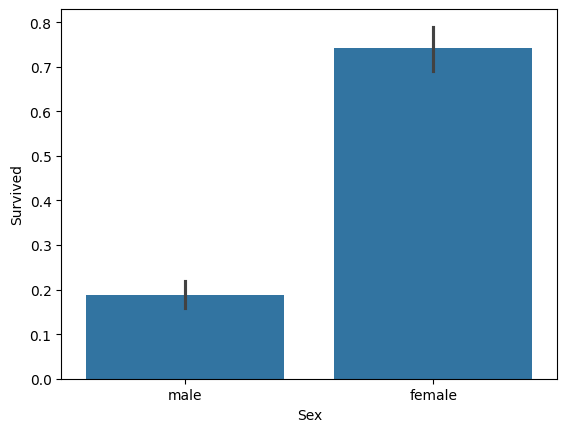

In [36]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

부자와 가난한 사람 간의 생존 확률 살펴보기. 부를 측정할 수 있는 속성으로 적당한 것은 객실 등급.  

<Axes: xlabel='Pclass', ylabel='Survived'>

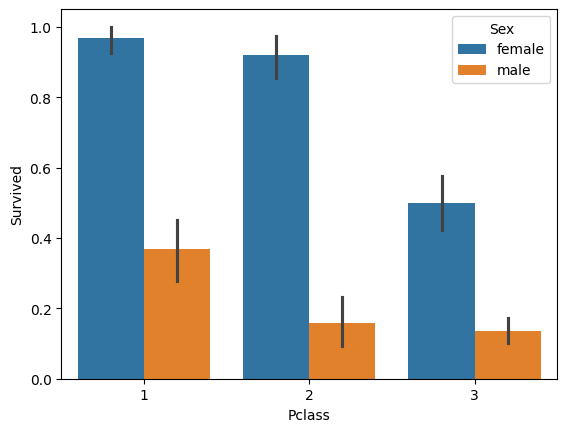

In [37]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

- 여성의 경우 일, 이등실에 따른 생존 확률의 차이는 크지 않으나, 삼등실의 경우 생존 확률이 상대적으로 많이 떨어짐.
- 남성의 경우 일등실의 생존 확률이 이, 삼등실의 생존 확률보다 월등히 높음

Age에 따른 생존 확률 보기. Age 값 종류가 많기 때문에 범위별로 분류해 카테고리 값 할당.

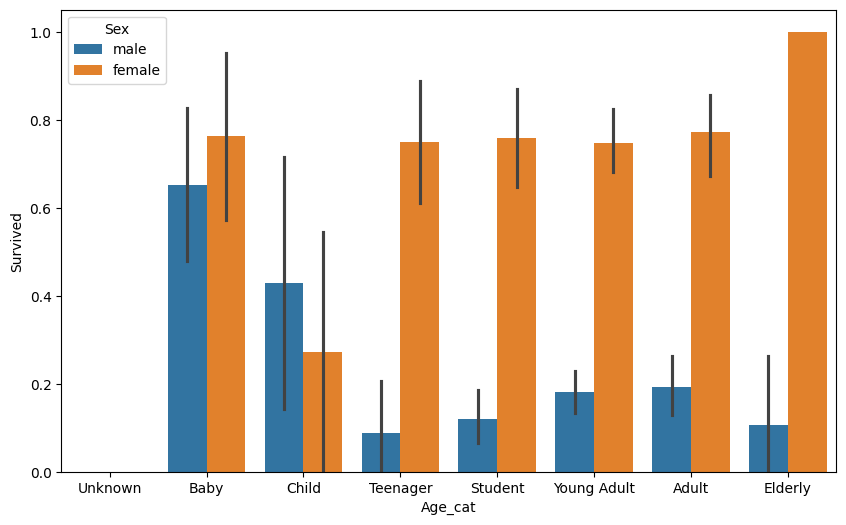

In [39]:
# 입력 age에 따라 구분 값 반환하는 함수 설정. DataFrame의 apply lambda 식에 사용
def get_category(age):
  cat = ''
  if age <= -1: cat = 'Unknown'
  elif age <= 5: cat = 'Baby'
  elif age <= 12: cat = 'Child'
  elif age <= 18: cat = 'Teenager'
  elif age <= 25: cat = 'Student'
  elif age <= 35: cat = 'Young Adult'
  elif age <= 60: cat = 'Adult'
  else : cat = 'Elderly'

  return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정
# get_category(X)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)


여자 Baby의 경우 비교적 생존 확률이 높았음. 여자 Child의 경우 다른 연령대에 비해 생존 확률이 낮음. 여자 Elderly의 경우 생존 확률이 매우 높음. 지금까지 분석한 결과 Sex, Age, PClass 등이 중요하게 생존을 좌우하는 피처임.

남아있는 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환.

In [40]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
  features = ['Cabin', 'Sex', 'Embarked']

  for feature in features:
    le = LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])

  return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


지금까지 피처를 가공한 내역을 정리하고 이를 함수로 만들어 쉽게 재사용할 수 있도록 만듦. 데이터의 전처리를 전체적으 호출하는 함수는 transform_features()이며 Null 처리, 불필요한 피처 제거, 인코딩을 수행하는 내부 함수 구성

- drop_features(df): 불필요한 피처 제거
- PassengerID, Name, Ticket 피처 제거

In [52]:
# Null 처리 함수

def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace = True)
  df['Embarked'].fillna('N', inplace=True)
  df['Fare'].fillna(0, inplace = True)
  return df

# 머신러닝 알고리즘에 블필요한 피처 제거

def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
  return df

# 레이블 인코딩 수행

def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)

  return df

In [53]:
# 원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

<ipython-input-52-66e896679c17>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-52-66e896679c17>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)


- 결정 트리, 랜덤 포레스트, 로지스틱 회귀를 이용해 타이타닉 생존자 예측
- LogisticRegression의 생성인자로 입력된 solver='liblinear'는 로지스틱 회귀의 최적화 알고리즘을 liblinear로 설정

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression(solver='liblinear')

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0: 4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도:{0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도:  0.787709
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도:0.8659


LogisticRegression이 타 알고리즘에 비해 높은 정확도를 나타냄. 아직 최적화 작업을 수행하지 않았고, 데이터 양도 충분하지 않기 때문에 어떤 알고리즘이 가장 성능이 좋다 평가할 수 없음.

다음으로 교차 검증으로 결정 트리 모델 평가.

In [58]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):

  # 폴드 세트를 5개인 KFold 객체를 생성, 폴드 수만큼 예측 결과 저장을 위한 리스트 객체 생성
  kfold = KFold(n_splits=folds)
  scores = []

  # KFold 교차 검증 수행
  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):

    # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
    X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

    # Classifier 학습/예측/정확도
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))

  # 5개의 fold에서의 평균 정확도 계산
  mean_score = np.mean(scores)
  print('평균 정확도: {0:.4f}'.format(mean_score))

# exec_kfold 호출
exec_kfold(dt_clf, folds = 5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


평균 정확도는 약 78.23%. 이번에는 교차 검증을 cross_val_score() API 이용해 수행.

In [62]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)

for iter_count, accuracy in enumerate(scores):
  print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))

print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


위와 정확도가 약간 다른데, 이는 cross_val_score()가 StratifiedKFold를 이용해 폴드 세트를 분할하기 때문. 마지막으로 GridSearchCV를 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측 성능을 측정.

In [64]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2,3,5,10],
              'min_samples_split':[2,3,5],
              'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8715


## 7. 정리

**머신러닝 애플리케이션**은 데이터의 가공, 변환 과정의 전처리 작업, 데이터를 학습 데이터와 테스트 데이터로 분리하는 작업을 거친 후에 학습 데이터를 기반으로 머신러닝 알고리즘을 적용해 모델을 학습시킴. 학습된 모델을 기반으로 테스트 데이터에 대한 예측을 수행하고, 예측된 결괏값을 실제 결괏값과 비교해 머신러닝 모델에 대한 평가를 수행하는 방식으로 구성

**데이터의 전처리 작업**은 오류 데이터 보정, 결손값 처리 등 다양한 데이터 클렌징 작업, 인코딩 작업, 데이터의 스케일링/정규화 작업 등으로 머신러닝 알고리즘이 최적으로 수행될 수 있게 데이터 사전 처리

머신러닝 모델은 학습 데이터 세트로 학습한 뒤 반드시 별도의 테스트 데이터 세트로 평가되어야 함.

KFold, StratifiedKFold, cross_val_score() 등을 통해 교차 검증. GridSearchCV 통해 최적의 하이퍼 파라미터를 추출